Estratégia de Preço - Investigando padrões lineares e não-lineares

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [3]:
# Carregar dados do Kaggle
data_path = "datasets/train.csv"  
data = pd.read_csv(data_path, parse_dates=['date'])

In [4]:
# Filtrar dados para simplificar (ex.: uma única loja)
store_id = 1  # Escolha uma loja específica
data = data[data['store_nbr'] == store_id]

In [5]:
# Adicionar coluna de preço médio fictício (simulação)
np.random.seed(42)
data['price'] = np.random.uniform(10, 50, len(data))  # Preços aleatórios entre 10 e 50

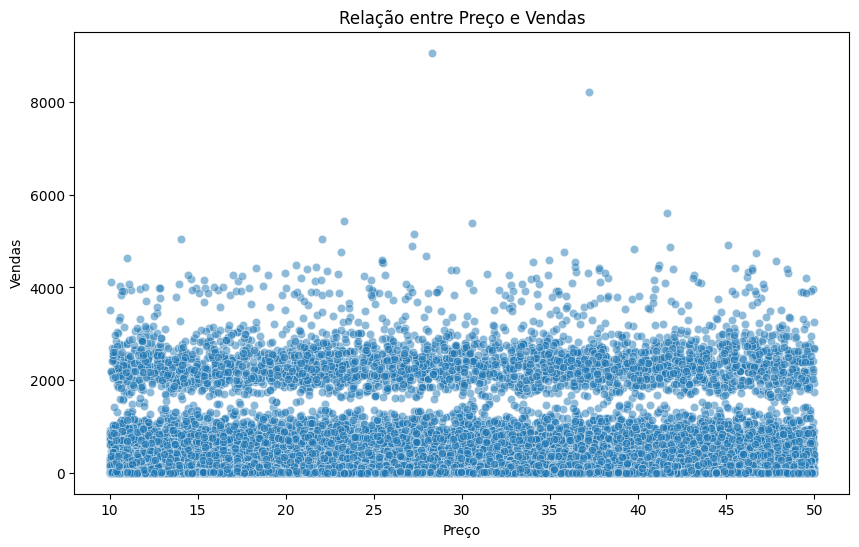

In [6]:
# Visualizar os dados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sales', data=data, alpha=0.5)
plt.title('Relação entre Preço e Vendas')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.savefig('price_sales_scatter.png')
plt.show()

Regressão Linear - Coeficiente: 0.07, Intercepto: 252.37


c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


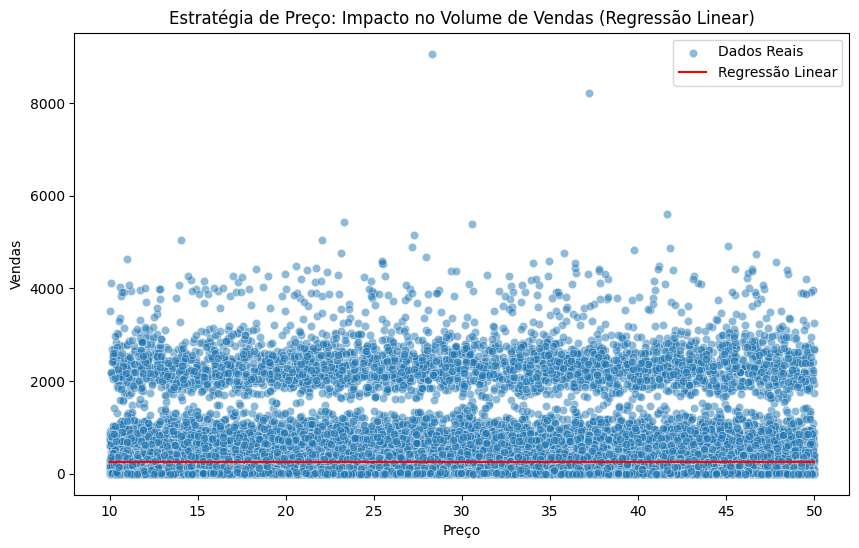

In [7]:
# Modelo 1: Regressão Linear
X = data[['price']]
y = data['sales']
linear_model = LinearRegression()
linear_model.fit(X, y)

# Coeficientes
print(f"Regressão Linear - Coeficiente: {linear_model.coef_[0]:.2f}, Intercepto: {linear_model.intercept_:.2f}")

# Prever vendas para diferentes preços
prices = np.linspace(data['price'].min(), data['price'].max(), 100).reshape(-1, 1)
predicted_sales_linear = linear_model.predict(prices)

# Plotar resultados da regressão linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sales', data=data, alpha=0.5, label='Dados Reais')
plt.plot(prices, predicted_sales_linear, color='red', label='Regressão Linear')
plt.title('Estratégia de Preço: Impacto no Volume de Vendas (Regressão Linear)')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.legend()
plt.savefig('price_strategy_linear.png')
plt.show()

c:\Users\u17820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


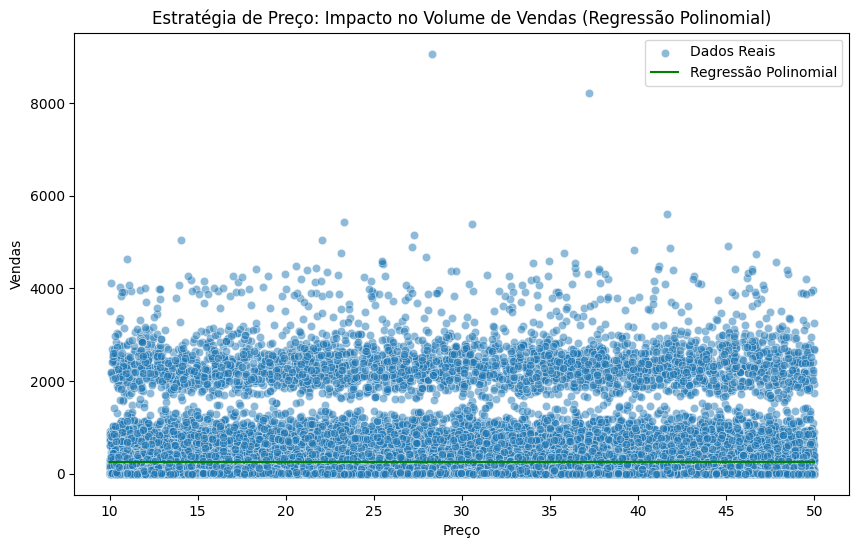

In [8]:
# Modelo 2: Regressão Polinomial
poly = PolynomialFeatures(degree=2)  # Grau 2 para capturar não linearidades
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Prever vendas para diferentes preços
prices_poly = poly.transform(prices)
predicted_sales_poly = poly_model.predict(prices_poly)

# Plotar resultados da regressão polinomial
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sales', data=data, alpha=0.5, label='Dados Reais')
plt.plot(prices, predicted_sales_poly, color='green', label='Regressão Polinomial')
plt.title('Estratégia de Preço: Impacto no Volume de Vendas (Regressão Polinomial)')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.legend()
plt.savefig('price_strategy_poly.png')
plt.show()

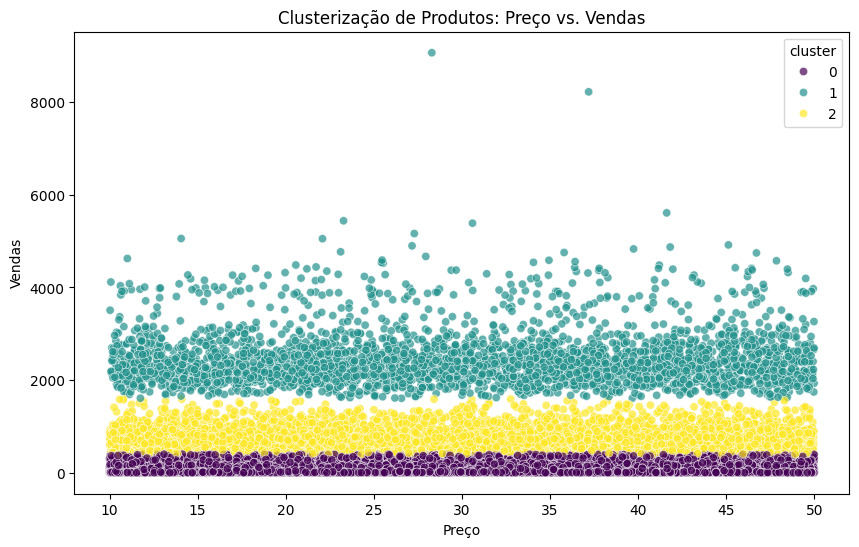

Preço Ótimo Sugerido (Regressão Linear): -3495.92


In [10]:
# Modelo 3: Clusterização de Produtos
# Criar clusters com base em preço e vendas
cluster_data = data[['price', 'sales']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(cluster_data)

# Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sales', hue='cluster', data=data, palette='viridis', alpha=0.7)
plt.title('Clusterização de Produtos: Preço vs. Vendas')
plt.xlabel('Preço')
plt.ylabel('Vendas')
plt.savefig('price_cluster.png')
plt.show()

# Sugestão de preço ótimo (baseado na regressão linear)
optimal_price = -linear_model.intercept_ / linear_model.coef_[0]
print(f"Preço Ótimo Sugerido (Regressão Linear): {optimal_price:.2f}")